### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

### Importing Dataset

In [2]:
data = pd.read_csv('Dry_Bean_Dataset.csv')
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

### Exploring Dataset 

#### 1.Shape of dataset
#### 2.Count of Null values
#### 3.Uniques values
#### 4.Statisitics of dataset

In [4]:
data.shape

(13611, 17)

In [5]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [6]:
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [7]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


### Checking outlies through Z-score

In [8]:
from scipy import stats
z=stats.zscore(X)
data=data[(np.abs(stats.zscore(X)) < 3).all(axis=1)]

In [9]:
data.shape

(12487, 17)

In [10]:
features=data.iloc[:, :-1].columns
X=data.iloc[:, :-1].values

In [11]:
X=pd.DataFrame(X)
y=data.iloc[:,-1].values

In [12]:
type(X)

pandas.core.frame.DataFrame

### Label Encoding on dependent variable

In [13]:
# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[5 5 5 ... 3 3 3]


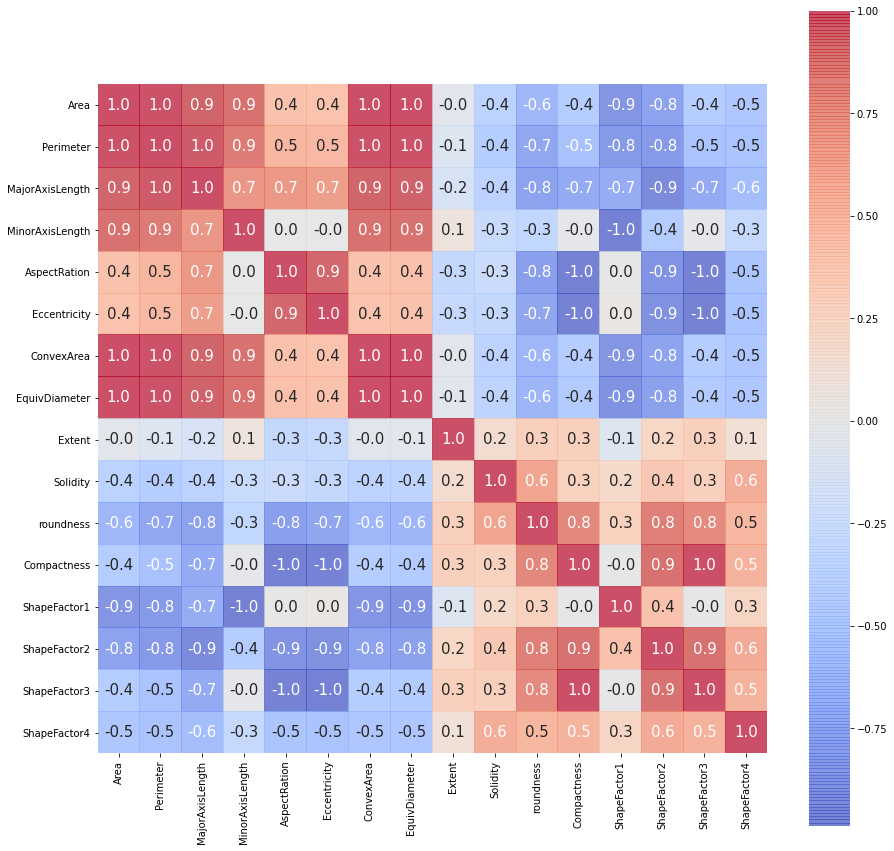

In [31]:
correlation= X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=features,yticklabels=features,alpha=0.7,cmap= 'coolwarm')
plt.show()

### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
print('Shape of X_train = ' + str(X_train.shape))
print('Shape of X_test = ' + str(X_test.shape))
print('Shape of y_train = ' + str(y_train.shape))
print('Shape of y_test = ' + str(y_test.shape))

Shape of X_train = (9365, 16)
Shape of X_test = (3122, 16)
Shape of y_train = (9365,)
Shape of y_test = (3122,)


### Scaling the features

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
y.shape

(12487,)

In [20]:
df=pd.DataFrame(y)

In [21]:
df[0].value_counts()

3    3520
6    2623
5    1897
4    1632
2    1544
0    1261
1      10
Name: 0, dtype: int64

### Visualizing Data after Preprocessing

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


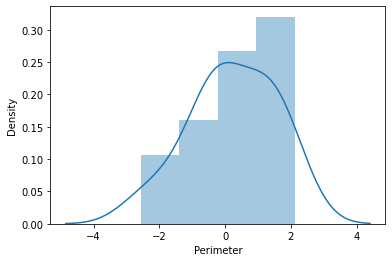

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


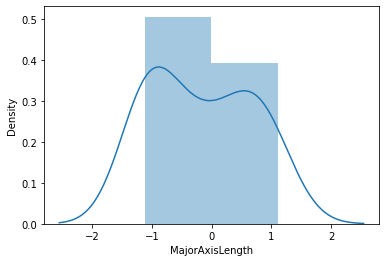

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


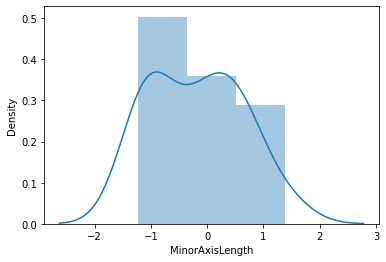

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


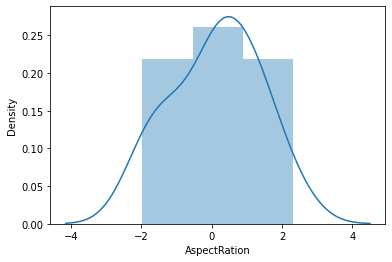

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


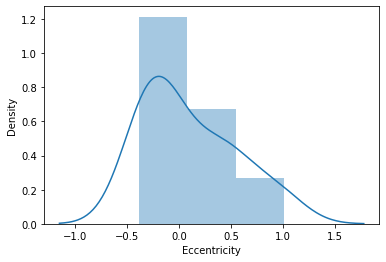

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


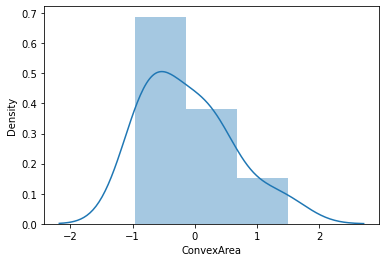

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


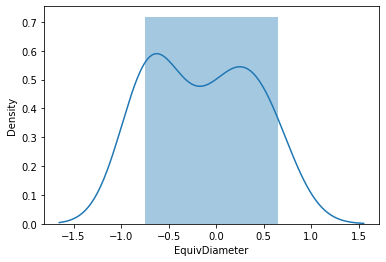

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


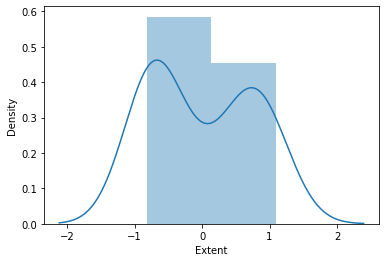

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


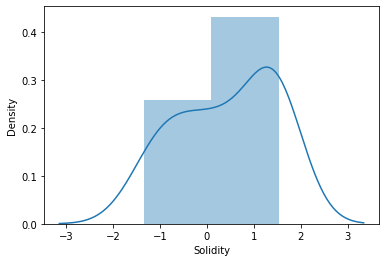

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


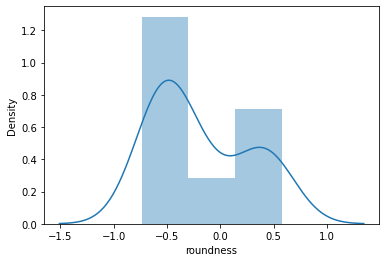

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


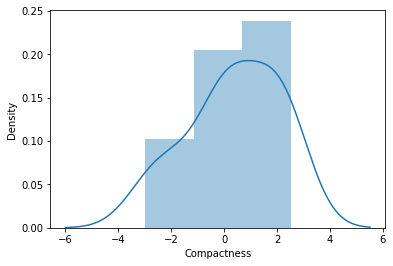

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


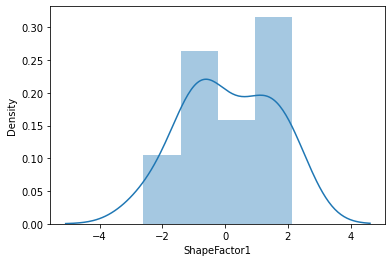

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


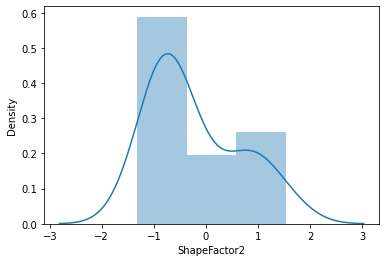

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


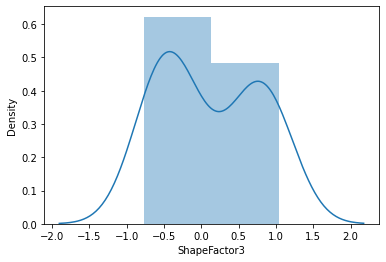

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


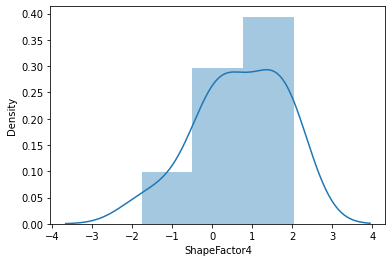

In [33]:
x2 = X_test

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,16):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()

### Applying Different Machine learning Models

### 1.KNN

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

Scores = []

for i in range (2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test,y_test)
    Scores.append(score)

print(knn.score(X_train,y_train))
print(Scores)

0.9272824345969034
[0.9010249839846253, 0.92152466367713, 0.924727738629084, 0.9256886611146701, 0.9234465086483024, 0.9218449711723254, 0.9260089686098655, 0.924727738629084, 0.9263292761050609]


### 2.Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

Scores = []

for i in range(1):
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    score = tree.score(X_test,y_test)
    Scores.append(score)

print(tree.score(X_train,y_train))
print(Scores)

1.0
[0.8939782190903267]


### 3.Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

Scores = []

for i in range(1):
    logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=100)
    logistic.fit(X_train, y_train)
    score = logistic.score(X_test,y_test)
    Scores.append(score)
    
print(logistic.score(X_train,y_train))
print(Scores)

0.9213027229044314
[0.9292120435618193]


c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 4.SVM Classifier (Non-Linear Kernal)

In [25]:
from sklearn.svm import SVC

Scores = []

for i in range(1):
    svc = SVC(gamma='auto')
    svc.fit(X_train, y_train)
    score = svc.score(X_test,y_test)
    Scores.append(score)

print(svc.score(X_train,y_train))
print(Scores)

0.9279231179925254
[0.933055733504164]


### 5.SVM Classifier (Linear Kernal)

In [26]:
from sklearn.svm import LinearSVC

Scores = []

for i in range(1):
    svc = LinearSVC(random_state=0)
    svc.fit(X_train, y_train)
    score = svc.score(X_test,y_test)
    Scores.append(score)

print(svc.score(X_train,y_train))
print(Scores)


0.9152162306460224
[0.9260089686098655]


c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### 6.Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

Scores = []
Range = [10,20,30,50,70,80,100,120]

for i in range(1):
    forest = RandomForestClassifier(criterion='gini', n_estimators=10, min_samples_leaf=1, min_samples_split=4, random_state=1,n_jobs=-1)
    #forest = RandomForestClassifier(n_estimators=i ,random_state=0)
    forest.fit(X_train, y_train)
    score = forest.score(X_test,y_test)
    #Scores.append(score)

print(forest.score(X_train,y_train))
print(score)

0.9893219434063001
0.9167200512491992


### 7.Neural Network

In [28]:
from sklearn.neural_network import MLPClassifier

Scores = []

for i in range(1):
    NN = MLPClassifier(random_state=0)
    NN.fit(X_train, y_train)
    score = NN.score(X_test,y_test)
    Scores.append(score)

print(NN.score(X_train,y_train))
print(Scores)

0.9369994660971703
[0.9336963484945547]


c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 8.Gradient Decent Tree Boosting

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gd = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

gd.fit(X_train, y_train)
score = gd.score(X_test,y_test)

print(gd.score(X_train,y_train))
print(score)

0.9475707421249333
0.9234465086483024


### Summary

#### considering overfitting and performance we will choose best model that is:
#### SVM (Linear Kernal)

#### training accuracy: 0.9152162306460224

#### testing accuracy:0.9260089686098655